In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import seaborn as sns

In [2]:
# Load cleaned BYAREA data and create a DataFrame for the data
cleaned_byarea_df = pd.read_csv('cleaned_byarea_df.csv')
cleaned_byarea_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# Check shape of DataFrame
cleaned_byarea_df.shape

(949308, 13)

In [4]:
# Check for info DataFrame
cleaned_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [5]:
# Check for any null values in DataFrame
cleaned_byarea_df.isnull().sum()

AREA                     0
AGE_ADJUSTED_CI_LOWER    0
AGE_ADJUSTED_CI_UPPER    0
AGE_ADJUSTED_RATE        0
EVENT_TYPE               0
POPULATION               0
RACE                     0
SEX                      0
SITE                     0
YEAR                     0
CRUDE_CI_LOWER           0
CRUDE_CI_UPPER           0
CRUDE_RATE               0
dtype: int64

In [6]:
# Generate our categorical variable list
cleaned_byarea_df_cat = cleaned_byarea_df.dtypes[cleaned_byarea_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
cleaned_byarea_df[cleaned_byarea_df_cat].nunique()

AREA          52
EVENT_TYPE     2
RACE           6
SEX            3
SITE          27
dtype: int64

In [7]:
# Check unique values of categories in DataFrame
print(cleaned_byarea_df['AREA'].unique())
print(cleaned_byarea_df['EVENT_TYPE'].unique())
print(cleaned_byarea_df['RACE'].unique())
print(cleaned_byarea_df['SEX'].unique())
print(cleaned_byarea_df['SITE'].unique())
print(cleaned_byarea_df['YEAR'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States (comparable to ICDO2)'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin'
 'Wyoming']
['Incidence' 'Mortality']
['All Races' 'American Indian/Alaska Native' 'Asian/Pacific Islander'
 'Black' 'Hispanic' 'White']
['Female' 'Male' 'Male and Female']
['All Cancer Sites Combined' 'Brain and Other Nervous System' 'Cervix'
 'Colon and Rectum' 'Corpus and Uterus, NOS' 'Esophagus' 'Female Breast'
 'Female Breast, <i>in situ</i>' 'Hodgkin Lymphoma'

In [8]:
# Basic statistics of the DataFrame
cleaned_byarea_df.describe()

,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,POPULATION,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
count,949308.000000,949308.000000,949308.000000,9.493080e+05,9.493080e+05,949308.000000,949308.000000,949308.000000
mean,17.767297,52.965639,23.320975,1.699207e+06,9.123496e+05,15.956262,34.295784,19.260361
std,59.935595,113.517577,67.282969,5.759383e+06,4.185053e+06,56.836111,68.848379,59.713485
min,0.000000,0.000000,0.000000,1.063000e+03,1.999000e+03,0.000000,0.000000,0.000000
25%,0.000000,6.700000,0.400000,4.066700e+04,2.004000e+03,0.000000,5.400000,0.400000
50%,2.100000,16.700000,5.000000,2.781340e+05,2.010000e+03,1.700000,12.200000,4.100000
75%,8.600000,45.500000,14.500000,1.525438e+06,2.015000e+03,7.700000,30.000000,11.700000
max,3979.600000,6890.400000,4529.600000,1.609219e+09,2.015202e+07,907.200000,1254.000000,996.400000


In [9]:
# Filter DataFrame for United States (comparable to ICDO2), 20152019, All Races, All Cancer Sites Combined
filtered_cleaned_byarea_df = cleaned_byarea_df[
    (cleaned_byarea_df['AREA'] != 'United States (comparable to ICDO2)') &  
    (cleaned_byarea_df['YEAR'] != 20152019) & 
    (cleaned_byarea_df['RACE'] != 'All Races') &
    (cleaned_byarea_df['SITE'] != 'All Cancer Sites Combined')
]

filtered_cleaned_byarea_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
3190,Alabama,0.0,51.9,0.0,Incidence,11411,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,32.3,0.0
3191,Alabama,0.0,51.9,0.0,Mortality,11411,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,32.3,0.0
3192,Alabama,0.0,44.9,0.0,Incidence,12506,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,29.5,0.0
3193,Alabama,0.0,44.9,0.0,Mortality,12506,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,29.5,0.0
3194,Alabama,0.0,43.1,0.0,Incidence,12933,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0,28.5,0.0


In [10]:
# Check shape of the filtered DataFrame
filtered_cleaned_byarea_df.shape

(721849, 13)

In [11]:
# Remove columns from filtered DataFrame
short_filtered_cleaned_byarea_df = filtered_cleaned_byarea_df[[
    'AREA', 
    'EVENT_TYPE', 
    'RACE', 
    'SEX', 
    'SITE' , 
    'YEAR', 
    'AGE_ADJUSTED_RATE']]

short_filtered_cleaned_byarea_df.head()

,AREA,EVENT_TYPE,RACE,SEX,SITE,YEAR,AGE_ADJUSTED_RATE
3190,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
3191,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
3192,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
3193,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
3194,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0


In [12]:
# converting the YEAR to datetime format
# short_filtered_cleaned_byarea_df['YEAR'].astype('int32')
# short_filtered_cleaned_byarea_df['YEAR'] = pd.to_datetime(short_filtered_cleaned_byarea_df['YEAR'], format='%Y')

In [13]:
# Check info of the DataFrame
short_filtered_cleaned_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721849 entries, 3190 to 949307
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AREA               721849 non-null  object 
 1   EVENT_TYPE         721849 non-null  object 
 2   RACE               721849 non-null  object 
 3   SEX                721849 non-null  object 
 4   SITE               721849 non-null  object 
 5   YEAR               721849 non-null  int64  
 6   AGE_ADJUSTED_RATE  721849 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 44.1+ MB


In [14]:
# Basic statistics of the short filtered DataFrame
short_filtered_cleaned_byarea_df.describe()

,YEAR,AGE_ADJUSTED_RATE
count,721849.000000,721849.000000
mean,2009.016721,11.831796
std,6.040536,25.008067
min,1999.000000,0.000000
25%,2004.000000,0.000000
50%,2009.000000,4.000000
75%,2014.000000,11.900000
max,2019.000000,1699.200000


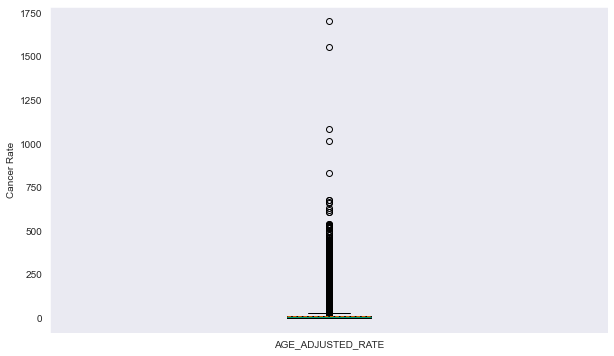

In [15]:
# plot box plot of age-adjusted rate,showing outliers
columns_plot = [short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE']]

x_labels = ['AGE_ADJUSTED_RATE']

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

fig, ax = plt.subplots(figsize = (10,6))

ax.boxplot(columns_plot,
           showmeans = True,
           meanline = True,
          # showfliers = False,
           labels = x_labels
          )

ax.set_ylabel('Cancer Rate')

plt.show()

In [16]:
# Remove outliers from the DataFrame
q1 = short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'].quantile(0.25)
q3 = short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'].quantile(0.75)
iqr = q3 - q1

print(((short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'] < (q1 - 1.5 * iqr)) | 
       (short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'] > (q3 + 1.5 * iqr))).sum())

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

short_filtered_cleaned_byarea_df2 = short_filtered_cleaned_byarea_df[
    (short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'] > fence_low) & 
    (short_filtered_cleaned_byarea_df['AGE_ADJUSTED_RATE'] < fence_high)
]

short_filtered_cleaned_byarea_df2.head()

68258


,AREA,EVENT_TYPE,RACE,SEX,SITE,YEAR,AGE_ADJUSTED_RATE
3190,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
3191,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0
3192,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
3193,Alabama,Mortality,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0
3194,Alabama,Incidence,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0


In [17]:
# Check info of the DataFrame after removing outliers (total 68258 outliers ~9.5%)
short_filtered_cleaned_byarea_df2.shape

(653591, 7)

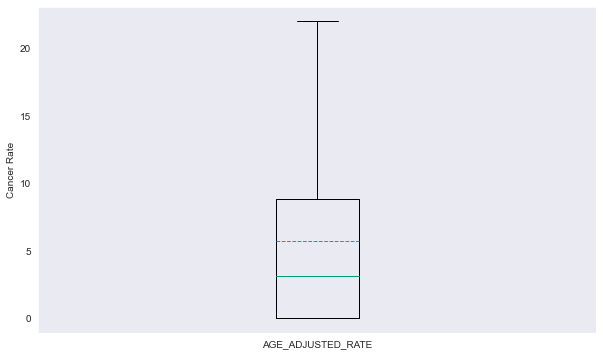

In [18]:
# plot box plot of age-adjusted rate,after removing outliers
columns_plot = [short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE']]

x_labels = ['AGE_ADJUSTED_RATE']

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

fig, ax = plt.subplots(figsize = (10,6))

ax.boxplot(columns_plot,
           showmeans = True,
           meanline = True,
          showfliers = False,
           labels = x_labels
          )

ax.set_ylabel('Cancer Rate')

plt.show()

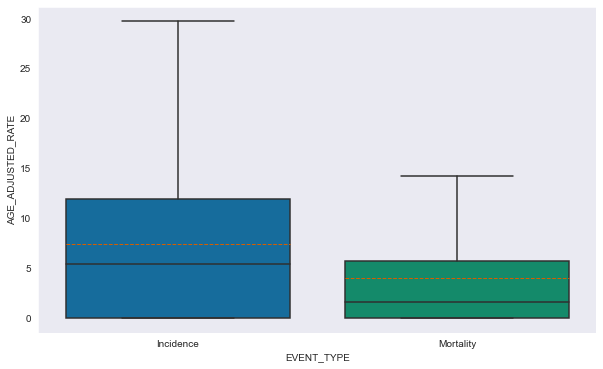

In [19]:
# plot box plot of age-adjusted rate for EVENT_TYPE showing outliers

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(10,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['EVENT_TYPE'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )

plt.show()

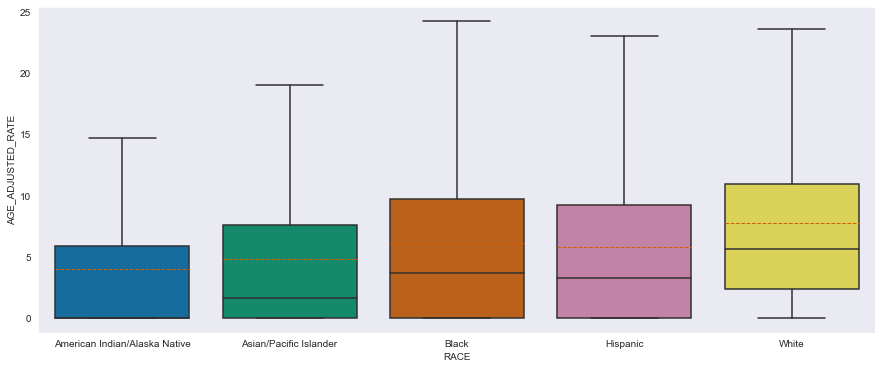

In [20]:
# plot box plot of age-adjusted rate for RACE 

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(15,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['RACE'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )
plt.show()

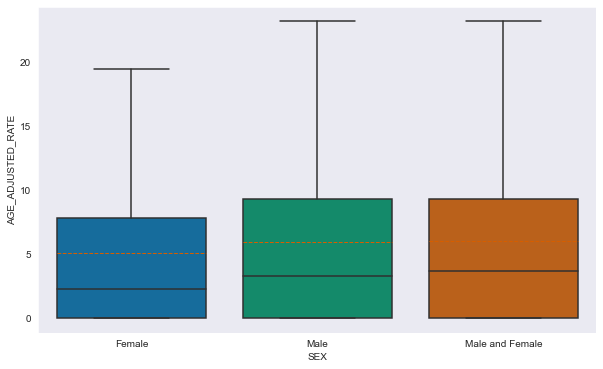

In [21]:
# plot box plot of age-adjusted rate for SEX 

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(10,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['SEX'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )
plt.show()

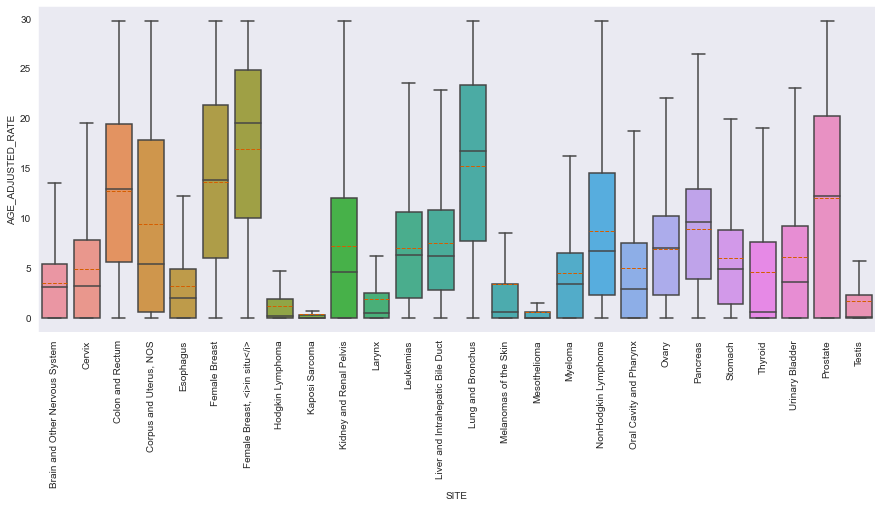

In [22]:
# plot box plot of age-adjusted rate for SITE

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(15,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['SITE'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

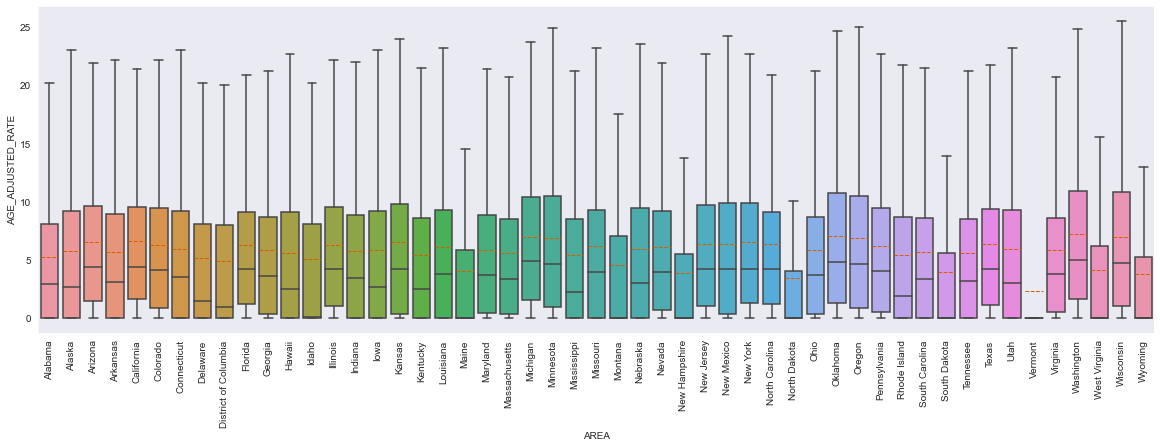

In [23]:
# plot box plot of age-adjusted rate for AREA

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['AREA'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

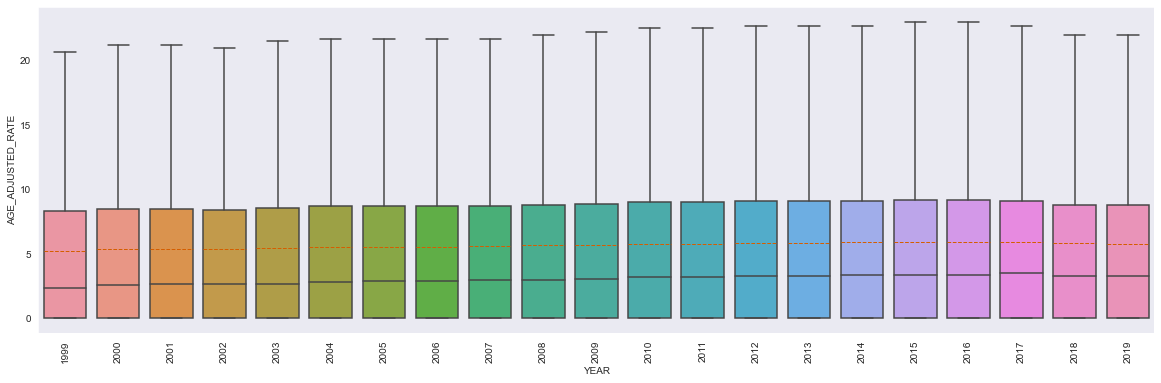

In [24]:
# plot box plot of age-adjusted rate for YEAR

plt.style.use('seaborn-colorblind')

sns.set_style('dark')

plt.figure(figsize=(20,6))

sns.boxplot(x = short_filtered_cleaned_byarea_df2['YEAR'], 
            y = short_filtered_cleaned_byarea_df2['AGE_ADJUSTED_RATE'],
           showmeans = True,
            showfliers = False,
           meanline = True
           )

plt.xticks(rotation = 90)

plt.show()

In [25]:
# Saving cleaned DataFrame to csv
short_filtered_cleaned_byarea_df2.to_csv('short_filtered_cleaned_byarea.csv', index = False)